In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

In [12]:
x = np.array([])
y = np.array([])
vx = np.array([])
vy = np.array([])

def addRecord(line):
    x = x.append(int(line[1]))
    y = y.append(int(line[2]))
    vx = vx.append(int(line[3]))
    vy = vy.append(int(line[4]))
    return

with open('dataset_best.txt') as f:
    for line in f:
        cur_line = line.rstrip().split(" ")
        if(cur_line[0] == '0'):
            ourX = int(cur_line[1])
            ourY = int(cur_line[2])
            ourVX = int(cur_line[3])
            ourVY = int(cur_line[4])
        else:
            x = np.append(x, int(cur_line[1]))
            y = np.append(y, int(cur_line[2]))
            vx = np.append(vx, int(cur_line[3]))
            vy = np.append(vy, int(cur_line[4]))
            
# #day one, the age and speed of 13 cars:
# plt.scatter(x, y)
# plt.scatter(ourX, ourY)
# plt.title(0)
# plt.show()

for i in range(1,60):
    if(i%3 == 0):
        ourX = ourX + (3*ourVX)
        ourY = ourY + (3*ourVY)
        newX = np.array([])
        newY = np.array([])
        
        for count, val in enumerate(x):
            predX = x[count] + (3*vx[count])
            predY = y[count] + (3*vy[count])
            newX = np.append(newX, predX)
            newY = np.append(newY, predY)
        x = newX
        y = newY
#         plt.scatter(x, y)
#         plt.scatter(ourX, ourY)
#         plt.title(i)
#         plt.show()

In [14]:
print(x.shape)
x

(50,)


array([ 1979.,   114., -1679.,  2186.,   327.,  -772.,  -346.,   585.,
         174.,  -989.,   -48., -1898.,  1280.,   485.,  -564.,   365.,
        -566., -1343., -1195.,   248., -1189.,  1808.,  -607., -1703.,
         252., -1196.,   549.,   979.,   387.,    39., -2591.,   720.,
        -650.,  -336.,   841.,  2219.,   195.,  2800.,  1049.,     9.,
        1919.,  -220., -1004., -1186.,  1328.,   228.,  -812.,  -875.,
         866.,   937.])

In [15]:
print(y.shape)
y

(50,)


array([  -68., -2172.,   248.,   129., -1407.,   625.,  -407.,  1793.,
         403.,   166.,  1859.,  2529.,   514.,  1758.,  1401.,   132.,
        1108.,  1355.,   250.,  2074.,  -644.,    74., -1714., -1623.,
        -810.,   -89.,   148.,   265.,   328.,  -891.,  -906.,  -817.,
        -166.,  1952.,  2814.,  2117.,  -563.,  -567.,  -467.,   -71.,
       -1702., -1686., -1313.,  1779., -1348.,   967., -1529., -1842.,
         605.,  -844.])

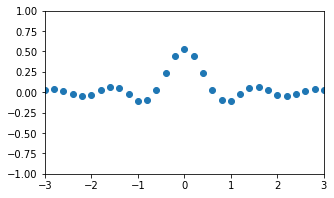

In [2]:
#setup plotting area
fig, ax = plt.subplots(figsize=(5, 3))
ax.set(xlim=(-3, 3), ylim=(-1, 1))

x = np.linspace(-3, 3, 91)
# t = np.linspace(1, 25, 30)
t = np.linspace(1, 10, 10)
X2, T2 = np.meshgrid(x, t)
 
sinT2 = np.sin(2*np.pi*T2/T2.max())
F = 0.9*sinT2*np.sinc(X2*(1 + sinT2))

# line = ax.plot(x, F[0, :], color='k', lw=2)[0]

# def animate(i):
#     line.set_ydata(F[i, :])
scat = ax.scatter(x[::3], F[0, ::3])

def animate(i):
    y_i = F[i, ::3]
    scat.set_offsets(np.c_[x[::3], y_i])

anim = FuncAnimation(fig, animate, interval=10, frames=len(t)-1)
plt.draw()
plt.show()
#anim.save('filename.mp4', writer='imagick')

In [9]:
print(x.shape)
x[::3]

(91,)


array([-3. , -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. ,
       -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,
        1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ])

In [11]:
t = np.linspace(1, 25, 30)

len(t)-1

29

In [8]:
print(F[0, ::3].shape)
F[0, ::3]

(31,)


array([ 0.02392622,  0.037328  ,  0.01599235, -0.02475891, -0.0481943 ,
       -0.02778704,  0.02541823,  0.06574797,  0.04881549, -0.02589549,
       -0.10204463, -0.09950146,  0.0261844 ,  0.24160161,  0.44552027,
        0.52900673,  0.44552027,  0.24160161,  0.0261844 , -0.09950146,
       -0.10204463, -0.02589549,  0.04881549,  0.06574797,  0.02541823,
       -0.02778704, -0.0481943 , -0.02475891,  0.01599235,  0.037328  ,
        0.02392622])